# Ejercicio 5

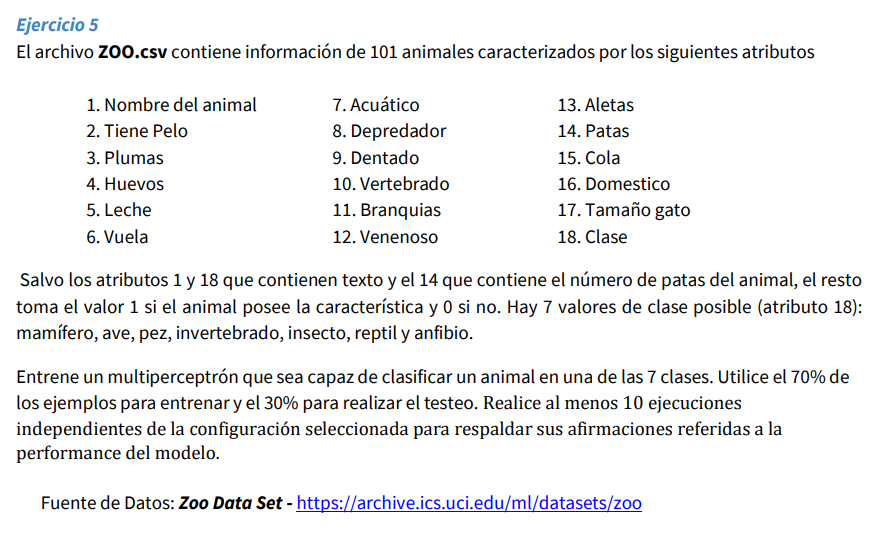

### Importe de librerias y lectura de datos

In [1]:

# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

nombre_archivo = DATOS_DIR + 'ZOO.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'], sep=',')

df.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics, model_selection

import time
#from matplotlib import pyplot as plt
from matplotlib import pylab as plt
from IPython import display
from sklearn.neural_network import MLPClassifier
from Funciones import evaluar, evaluarDerivada

### Ejercicio

In [4]:
df.head()

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero


El nombre del animal no lo voy a usar para entrenar porque no aporta informacion sobre las caracteristicas y esta correlacionado linealmente con la clase. Si tengo 101 animales distintos es lo mismo tener el indice que el nombre, no aporta

In [5]:
df['Clase'].unique()

array(['Mamifero', 'Pez', 'Ave', 'Invertebrado', 'Insecto', 'Anfibio',
       'Reptil'], dtype=object)

In [6]:
X = np.array(df.iloc[:,1:-1])
Y = np.array (df['Clase'])

In [7]:
entradas = X.shape[1]
salidas = len(np.unique(Y))
print(entradas)
print (salidas)

16
7


In [15]:
precisiones = []
for i in range(11):
    print (f'Ejecucion {i+ 1}') #11 ejecuciones independientes

    #conjuntos de entrenamiento y testeo
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split( X,Y, test_size=0.30 , random_state=i)

    #normalizacion de los datos
    normalizarEntrada = 1  
    if normalizarEntrada:
        # Escala los valores entre 0 y 1
        min_max_scaler = preprocessing.StandardScaler()
        X_train = min_max_scaler.fit_transform(X_train)
        X_test = min_max_scaler.transform(X_test)
    
    #creacion del multiperceptron
    clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')
    
    #entrenamiento del MLP
    history = clf.fit(X_train,Y_train)

    #prediccion en el conjunto de prueba
    Y_pred = clf.predict(X_test)

    #almacenamiento de las precisiones en lista
    precision = metrics.accuracy_score(Y_test, Y_pred)
    precisiones.append(precision)


Ejecucion 1


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 2


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 3


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 4


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 5


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 6


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 7


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 8


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 9


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 10


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Ejecucion 11


c:\Users\VICTUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
precision_promedio = np.mean(precisiones)
print(f'La precision promedio es {precision_promedio}')

La precision promedio es 0.8328445747800586
